In [45]:
import os
import numpy as np
import nibabel as nib

from matplotlib import pyplot as plt
import matplotlib.colors as colors

from scipy.stats import pearsonr

In [28]:
dwi_file = nib.streamlines.load(
    "../subjects/ismrm_gt/marked_fibers/2019-11-10-13:06:24/marked.trk")

In [29]:
tractogram = dwi_file.tractogram

In [59]:
mean_curvatures = np.zeros(len(tractogram))
max_curvatures = np.zeros(len(tractogram))
log_prob_sums = np.zeros(len(tractogram))
lengths = np.array([len(t) for t in tractogram])

In [60]:
for i, tract in enumerate(tractogram):
    curvature = tract.data_for_points["k"]
    mean_curvatures[i] = curvature.mean()
    max_curvatures[i] = curvature.max()
    log_prob_sums[i] = tract.data_for_points["log_prob_sum"][0]

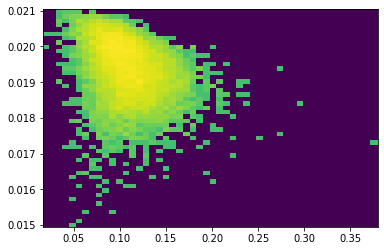

In [54]:
plt.hist2d(mean_curvatures, log_prob_sums, bins=50, density=True,
                norm=colors.SymLogNorm(linthresh=0.01, linscale=1));

In [41]:
pearsonr(mean_curvatures, log_prob_sums)

(-0.33713985175375216, 1.132450653597593e-279)

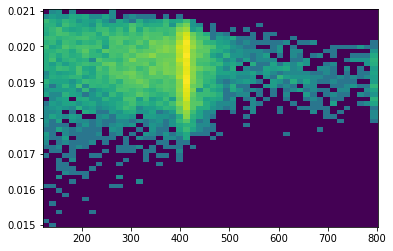

In [67]:
plt.hist2d(lengths, log_prob_sums, bins=50, density=True,
                norm=colors.SymLogNorm(linthresh=0.01, linscale=1));

In [63]:
pearsonr(lengths, log_prob_sums)

(-0.07569657572725245, 6.261675636434001e-15)